# Foundations of Computational Economics #9

by Fedor Iskhakov, ANU

<img src="_static/img/dag3logo.png" style="width:256px;">

## Algorithms and complexity

<img src="_static/img/lecture.png" style="width:64px;">

<img src="_static/img/youtube.png" style="width:65px;">

[https://youtu.be/pBbpEBVheOQ](https://youtu.be/pBbpEBVheOQ)

Description: Timing of Python code. Runtime order of growth. Complexity classes. P vs NP.

### Two ways to evaluate the polynomial

$$
y = a_1 + a_2 x + a_3 x^2 + \dots + a_k x^k
$$

Algorithm 1: compute each term, then add together

Algorithm 2: try to avoid computing powers

In [1]:
def calc_polynomial(qs=[0,], x=0.0, algorithm='fast'):
    '''Evaluates the polynomial given by coefficients qs at given x.
    First coefficient qs[0] is a constant, last coefficient is for highest power.
    '''
    if algorithm is not 'fast':
        # slower algorithm
        res=0.0
        for k in range(len(qs)):
            xpw = x**k
            res += qs[k] * xpw
    else:
        # faster algorithm
        res,xpw = qs[0], x  # init result and power of x
        for i in range(1,len(qs)):  # start with second coefficient
            res += xpw * qs[i]
            xpw *= x
    return res

#### Timing function evaluation

Several ways to measure run time in python

- **time** module  
- **timeit** module (for small snippets)  
- profiles (**profile** and **cProfile**, for large codes)  


In Jupyter Notebooks we can use a **magic function** timeit

In [ ]:
@timeit <options> <line of code to be timed>

In [ ]:
@@timeit <options> <setup command>
all lines of code in the cell
to be timed together

[Documentation on @timeit](https://ipython.readthedocs.io/en/stable/interactive/magics.html?highlight=timeit#magic-timeit)

In [4]:
%%timeit -n100 -r100 qs = [1,]*100
calc_polynomial(qs,15,'slow')

48.3 µs ± 6.72 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


In [5]:
%%timeit -n100 -r100 qs = [1,]*100
calc_polynomial(qs,15,'fast')

15.6 µs ± 2.33 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


### Algorithms

**Sequence of commands** for computer to run

1. How much time does it take to run?  
1. How much memory does it need?  
1. What other resources may be limiting? (storage, communication, etc)  


**Smart algorithm is a lot more important that fast computer**

#### Computational speed and algorithm development

[Professor Martin Grötschel Konrad-Zuse-Zentrum für Informationstechnik
Berlin, expert in optimization](http://robertvienneau.blogspot.com/2011/01/increase-in-feasibility-of-economic.html)

> “a benchmark production planning model solved using linear
programming would have taken 82 years to solve in 1988, using the
computers and the linear programming algorithms of the day. Fifteen
years later – in 2003 – this same model could be solved in roughly 1
minute, an improvement by a factor of roughly 43 million. Of this, a
factor of roughly 1,000 was due to increased processor speed, whereas
a factor of roughly 43,000 was due to improvements in algorithms!”

In [32]:
%%writefile 'algorithm_examples.py'

# Example code to be discussed in the following videos

import time

def parity (n,verbose=False):
    '''Returns 1 if passed integer number is odd
    '''
    if not isinstance(n, int): raise TypeError('Only integers in parity()')
    if verbose: print('n = ', format(n, "b"))  # print binary form of the number
    return n & 1  # bitwise and operation returns the value of last bit

def maximum_from_list (vars):
    '''Returns the maximum from a list of values
    '''
    m=float('-inf')  # init with the worst value
    for v in vars:
        if v > m: m = v
    return m

def binary_search(grid=[0,1],val=0,delay=0):
    '''Returns the index of val on the sorted grid
    Optional delay introduces a delay (in microsecond)
    '''
    i1,i2 = 0,len(grid)-1
    if val==grid[i1]: return i1
    if val==grid[i2]: return i2
    j=(i1+i2)//2
    while grid[j]!=val:
        if val>grid[j]:
            i1=j
        else:
            i2=j
        j=(i1+i2)//2  # divide in half
        time.sleep(delay*1e-6)  # micro-sec to seconds
    return j

def compositions(N,m):
    '''Iterable on compositions of N with m parts
    Returns the generator (to be used in for loops)
    '''
    cmp=[0,]*m
    cmp[m-1]=N  # initial composition is all to the last
    yield cmp
    while cmp[0]!=N:
        i=m-1
        while cmp[i]==0: i-=1  # find lowest non-zero digit
        cmp[i-1] = cmp[i-1]+1  # increment next digit
        cmp[m-1] = cmp[i]-1    # the rest to the lowest
        if i!=m-1: cmp[i] = 0  # maintain cost sum
        yield cmp

Overwriting algorithm_examples.py


#### Parity of a number

Check whether an integer is odd or even.

Algorithm: check the last bit in the binary representation of a number

In [33]:
# import all example code
from algorithm_examples import *

for k in [10**(i+1)+i for i in range(5)]:
    print('k=%d (%d bits)' % (k,k.bit_length()))
    tt = %timeit -n5000 -r500 -o parity(k)

k=10 (4 bits)
64.6 ns ± 31.4 ns per loop (mean ± std. dev. of 500 runs, 5,000 loops each)
k=101 (7 bits)
47.4 ns ± 0.399 ns per loop (mean ± std. dev. of 500 runs, 5,000 loops each)
k=1002 (10 bits)
47.4 ns ± 1.7 ns per loop (mean ± std. dev. of 500 runs, 5,000 loops each)
k=10003 (14 bits)
47.5 ns ± 1.18 ns per loop (mean ± std. dev. of 500 runs, 5,000 loops each)
k=100004 (17 bits)
47.7 ns ± 2.98 ns per loop (mean ± std. dev. of 500 runs, 5,000 loops each)


The slowest run took 13.87 times longer than the fastest. This could mean that an intermediate result is being cached.
104 ns ± 98.3 ns per loop (mean ± std. dev. of 100 runs, 5,000 loops each)
62.6 ns ± 8.53 ns per loop (mean ± std. dev. of 100 runs, 5,000 loops each)
47.1 ns ± 1.16 ns per loop (mean ± std. dev. of 100 runs, 5,000 loops each)
46.5 ns ± 0.407 ns per loop (mean ± std. dev. of 100 runs, 5,000 loops each)
46.5 ns ± 0.489 ns per loop (mean ± std. dev. of 100 runs, 5,000 loops each)
46.5 ns ± 0.346 ns per loop (mean ± std. dev. of 100 runs, 5,000 loops each)
46.4 ns ± 0.655 ns per loop (mean ± std. dev. of 100 runs, 5,000 loops each)
46.5 ns ± 0.658 ns per loop (mean ± std. dev. of 100 runs, 5,000 loops each)
46.4 ns ± 0.724 ns per loop (mean ± std. dev. of 100 runs, 5,000 loops each)
54.9 ns ± 3.26 ns per loop (mean ± std. dev. of 100 runs, 5,000 loops each)
55.3 ns ± 1.32 ns per loop (mean ± std. dev. of 100 runs, 5,000 loops each)
55.9 ns ± 3.67 ns per loop (mean ± std. 

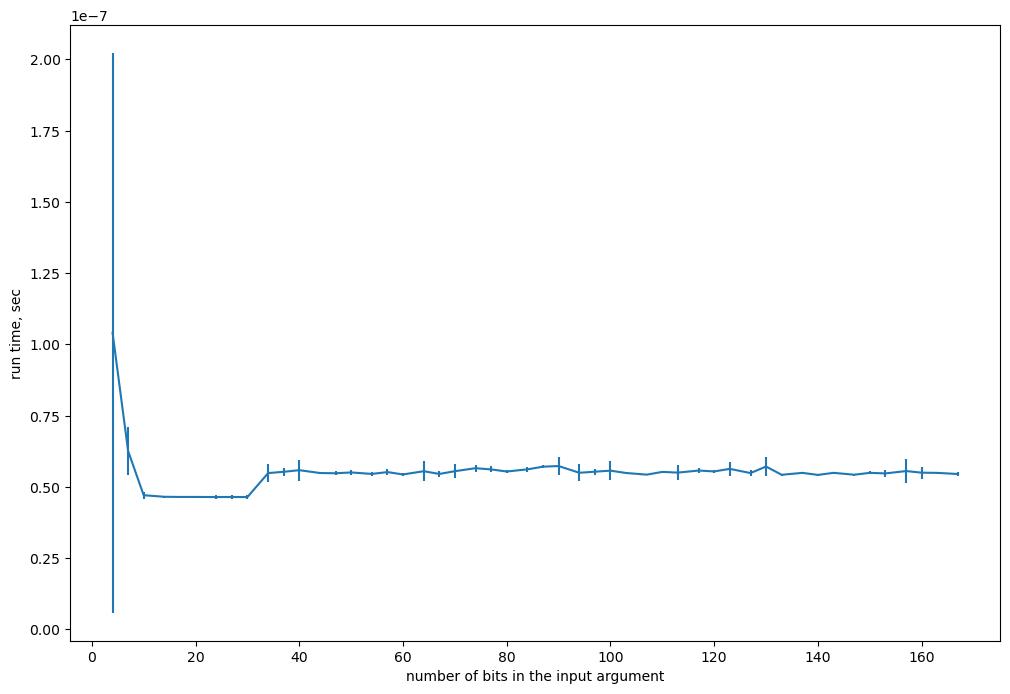

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

N = 50
kk = lambda i: 10**(i+1)+i  # step formula
n,x,std = [0]*N,[0]*N,[0]*N # initialize data lists
for i in range(N):
    k = kk(i)  # input value for testing
    n[i] = k.bit_length() # size of problem = bits in number
    t = %timeit -n5000 -r100 -o parity(k)
    x[i] = t.average
    std[i] = t.stdev

plt.errorbar(n,x,std)
plt.xlabel('number of bits in the input argument')
plt.ylabel('run time, sec')
plt.show()

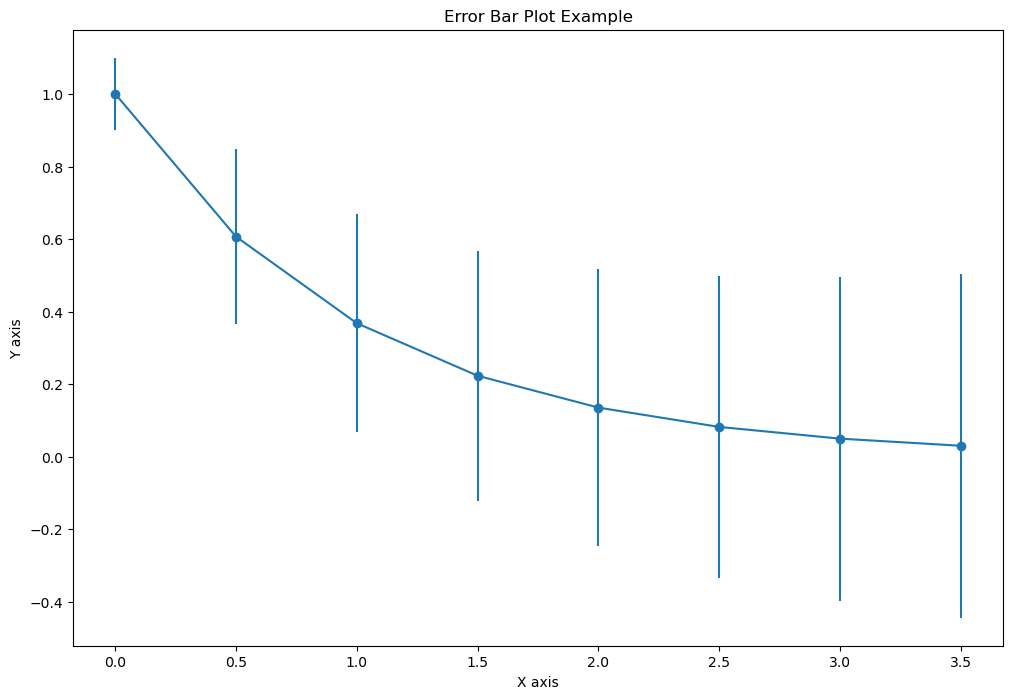

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
n = np.arange(0., 4., 0.5)  # x-values
x = np.exp(-n)             # y-values
std = 0.1 + 0.2 * np.sqrt(n)  # error values (standard deviation)

# Creating the error bar plot
plt.errorbar(n, x, yerr=std, fmt='-o')

# Adding titles and labels
plt.title('Error Bar Plot Example')
plt.xlabel('X axis')
plt.ylabel('Y axis')

# Show the plot
plt.show()


#### Finding max/min of a list

Find max or min in an unsorted list of values

Algorithm: run through the list once

In [44]:
import numpy as np

N = 10
# generate uniformly distributed values between given bounds
x = np.random.uniform(low=0.0, high=100.0, size=N)
print(x)
print("max=%f"%maximum_from_list(x))

[16.14436633 61.63923996 35.99701166 18.24833991  4.36188616 64.27285323
 18.0432001  53.04489067 12.62324687 34.39726899]
max=64.272853


598 ns ± 172 ns per loop (mean ± std. dev. of 100 runs, 1,000 loops each)
405 ns ± 51.7 ns per loop (mean ± std. dev. of 100 runs, 1,000 loops each)
435 ns ± 12.9 ns per loop (mean ± std. dev. of 100 runs, 1,000 loops each)
482 ns ± 2.1 ns per loop (mean ± std. dev. of 100 runs, 1,000 loops each)
558 ns ± 2.07 ns per loop (mean ± std. dev. of 100 runs, 1,000 loops each)
640 ns ± 6.63 ns per loop (mean ± std. dev. of 100 runs, 1,000 loops each)
695 ns ± 16.9 ns per loop (mean ± std. dev. of 100 runs, 1,000 loops each)
763 ns ± 16.3 ns per loop (mean ± std. dev. of 100 runs, 1,000 loops each)
794 ns ± 4.6 ns per loop (mean ± std. dev. of 100 runs, 1,000 loops each)
869 ns ± 16 ns per loop (mean ± std. dev. of 100 runs, 1,000 loops each)
932 ns ± 21.8 ns per loop (mean ± std. dev. of 100 runs, 1,000 loops each)
1.03 µs ± 4.81 ns per loop (mean ± std. dev. of 100 runs, 1,000 loops each)
1.1 µs ± 21.3 ns per loop (mean ± std. dev. of 100 runs, 1,000 loops each)
1.1 µs ± 13.4 ns per loop (me

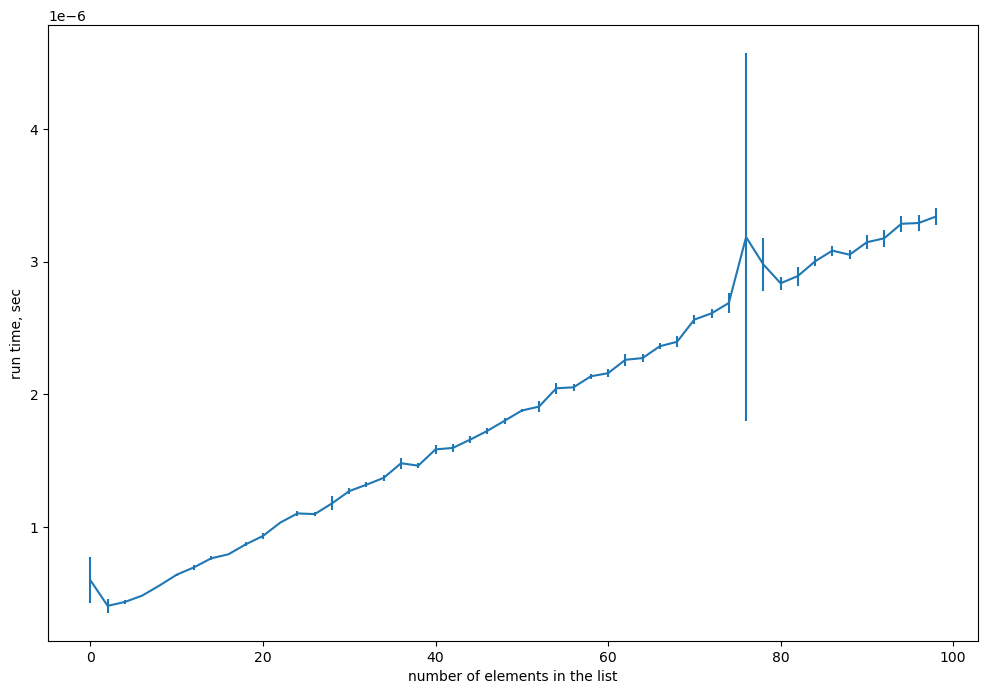

In [48]:
N = 50
kk = lambda i: 2*i  # step formula
n,x,std = [0]*N,[0]*N,[0]*N # initialize data lists
for i in range(N):
    n[i] = kk(i) # size of the array
    vv = np.random.uniform(low=0.0, high=100.0, size=n[i])
    t = %timeit -n1000 -r100 -o maximum_from_list(vv)
    x[i] = t.average
    std[i] = t.stdev

plt.errorbar(n,x,std)
plt.xlabel('number of elements in the list')
plt.ylabel('run time, sec')
plt.show()

### Binary search

Find an element between given boundaries

1. Think of number between 1 and 100  
1. How many guesses are needed to locate it if the only answers are “below” and “above”?  
1. What is the optimal sequece of questions?  

In [53]:
N = 10
# random sorted sequence of integers up to 100
x = np.random.choice(100,size=N,replace=False)
x = np.sort(x)
k0 = np.random.choice(N,size=1)
k0
k1 = binary_search(grid=x,val=x[k0])
k1

6

In [68]:
N = 50  # number of points
kk = lambda i: 100+(i+1)*500  # step formula
# precompute the sorted sequence of integers of max length
vv = np.random.choice(10*kk(N),size=kk(N),replace=False)
vv = np.sort(vv)
n

6

525 µs ± 36.7 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
610 µs ± 74.6 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
619 µs ± 37.1 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
653 µs ± 35.2 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
680 µs ± 32.4 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
688 µs ± 36.9 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
697 µs ± 30.9 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
697 µs ± 31.7 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
720 µs ± 30.8 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
728 µs ± 30.1 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
736 µs ± 36.6 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
753 µs ± 33.9 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
760 µs ± 37.2 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
756 µs ± 36.2 µs per loop (mean ± std. dev. of 100 runs, 10 loop

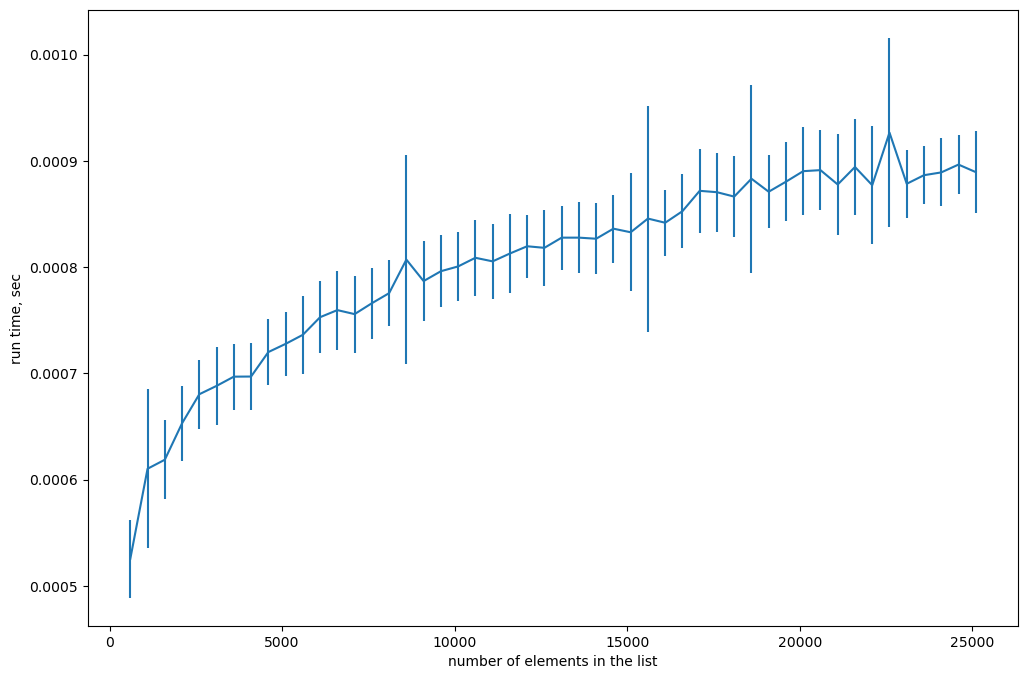

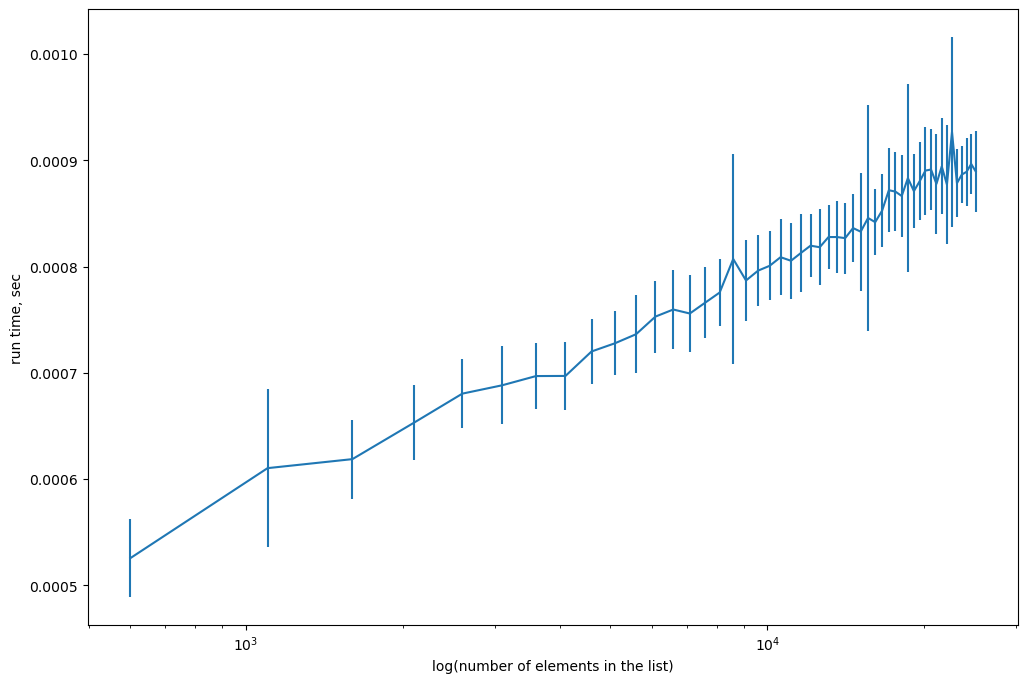

In [69]:
N = 50  # number of points
kk = lambda i: 100+(i+1)*500  # step formula
# precompute the sorted sequence of integers of max length
vv = np.random.choice(10*kk(N),size=kk(N),replace=False)
vv = np.sort(vv)

n,x,std = [0]*N,[0]*N,[0]*N   # initialize lists
for i in range(N):
    n[i] = kk(i)  # number of list elements
    # randomize the choice in each run to smooth out simulation error
    t = %timeit -n10 -r100 -o binary_search(grid=vv[:n[i]],val=vv[np.random.choice(n[i],size=1)],delay=50)
    x[i] = t.average
    std[i] = t.stdev

plt.errorbar(n,x,std)
plt.xlabel('number of elements in the list')
plt.ylabel('run time, sec')
plt.show()

plt.errorbar(n,x,std)
plt.xscale('log')
plt.xlabel('log(number of elements in the list)')
plt.ylabel('run time, sec')
plt.show()

#### Binary tree and divide-and-conquer algorithms

<img src="_static/img/binary.png" style="width:600px;">

### Big-O notation

Useful way to label the complexity of an algorithm, where $ n $ is the size of the input or other dimension of the problem

$$
f(n)=\mathcal{O}\big(g(n)\big) \Leftrightarrow
$$

$$
\exists M>0 \text{ and } N \text{ such than } |f(n)| < M |g(n)|  \text{ for all } n>N,
$$

Thus, functions $ f(n) $ and $ g(n) $ grow on the same *order*

### Focus on the worst case

In measuring solution time we may distinguish performance in

- best (easiest to solve) case  
- average case  
- worst case ($ \leftarrow $ the focus of the theory!)  


Constants and lower terms are ignored because we are only interested in *order* or growth

### Classes of algorithm complexity

- $ \mathcal{O}(1) $ constant time  
- $ \mathcal{O}(\log_{2}(n)) $ logarithmic time  
- $ \mathcal{O}(n) $ linear time  
- $ \mathcal{O}(n \log_{2}(n)) $ quasi-linear time  
- $ \mathcal{O}(n^{k}), k>1 $ quadratic, cubic, etc. **polinomial** time
  $ \uparrow $ **Tractable**  
- $ \mathcal{O}(2^{n}) $ exponential time $ \downarrow $
  **Curse of dimensionality**  
- $ \mathcal{O}(n!) $ factorial time  

#### Classes of algorithm complexity

<img src="_static/img/bigO.png" style="width:600px;">

#### How many operations as function of input size?

- Parity: Just need to check the lowest bit, does not depend on input size $ \Rightarrow \mathcal{O}(1) $  
- Maximum element: Need to loop through elements once: $ \Rightarrow \mathcal{O}(n) $  
- Binary search: Divide the problem in 2 each step $ \Rightarrow \mathcal{O}(\log(n)) $  
- Examples of $ \mathcal{O}(2^n) $ or more?  

#### Allocation of discrete good

**Problem**

Maximize welfare $ W(x_1,x_2,\dots,x_n) $ subject to
$ \sum_{i=1}^{n}x_i = A $ where $ A $ is *discrete* good that is
only divisible in steps of $ \Lambda $.

Let $ M=A/\Lambda \in \mathbb{N} $. Let
$ p_i \in \{0,1,\dots,M\} $ such that $ \sum_{i=1}^{n}p_i = M $.

Then the problem is equivalent to maximize
$ W(\Lambda p_1,\Lambda p_2,\dots,\Lambda p_n) $ subject to above.

$ (p_1,p_2,\dots,p_n) $ is **composition** of number $ M $ into
$ n $ parts.

In [13]:
import scipy.special
n, M = 4, 8
total = scipy.special.comb(M+n-1,n-1) # M+n-1 choose n-1
print("Total number of compositions is %d"%total)

for i,k in enumerate(compositions(M,n)):
    print('%3d'%i,end=": ")
    print(k)

Total number of compositions is 165
  0: [0, 0, 0, 8]
  1: [0, 0, 1, 7]
  2: [0, 0, 2, 6]
  3: [0, 0, 3, 5]
  4: [0, 0, 4, 4]
  5: [0, 0, 5, 3]
  6: [0, 0, 6, 2]
  7: [0, 0, 7, 1]
  8: [0, 0, 8, 0]
  9: [0, 1, 0, 7]
 10: [0, 1, 1, 6]
 11: [0, 1, 2, 5]
 12: [0, 1, 3, 4]
 13: [0, 1, 4, 3]
 14: [0, 1, 5, 2]
 15: [0, 1, 6, 1]
 16: [0, 1, 7, 0]
 17: [0, 2, 0, 6]
 18: [0, 2, 1, 5]
 19: [0, 2, 2, 4]
 20: [0, 2, 3, 3]
 21: [0, 2, 4, 2]
 22: [0, 2, 5, 1]
 23: [0, 2, 6, 0]
 24: [0, 3, 0, 5]
 25: [0, 3, 1, 4]
 26: [0, 3, 2, 3]
 27: [0, 3, 3, 2]
 28: [0, 3, 4, 1]
 29: [0, 3, 5, 0]
 30: [0, 4, 0, 4]
 31: [0, 4, 1, 3]
 32: [0, 4, 2, 2]
 33: [0, 4, 3, 1]
 34: [0, 4, 4, 0]
 35: [0, 5, 0, 3]
 36: [0, 5, 1, 2]
 37: [0, 5, 2, 1]
 38: [0, 5, 3, 0]
 39: [0, 6, 0, 2]
 40: [0, 6, 1, 1]
 41: [0, 6, 2, 0]
 42: [0, 7, 0, 1]
 43: [0, 7, 1, 0]
 44: [0, 8, 0, 0]
 45: [1, 0, 0, 7]
 46: [1, 0, 1, 6]
 47: [1, 0, 2, 5]
 48: [1, 0, 3, 4]
 49: [1, 0, 4, 3]
 50: [1, 0, 5, 2]
 51: [1, 0, 6, 1]
 52: [1, 0, 7, 0]
 53: [1, 1

5.69 µs ± 298 ns per loop (mean ± std. dev. of 10 runs, 2 loops each)
60.1 µs ± 398 ns per loop (mean ± std. dev. of 10 runs, 2 loops each)
515 µs ± 120 µs per loop (mean ± std. dev. of 10 runs, 2 loops each)
3.02 ms ± 184 µs per loop (mean ± std. dev. of 10 runs, 2 loops each)
16.7 ms ± 1.01 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)
71.1 ms ± 3.83 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)
250 ms ± 3.04 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)
893 ms ± 18.4 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)
2.96 s ± 90.7 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)
8.83 s ± 122 ms per loop (mean ± std. dev. of 10 runs, 2 loops each)


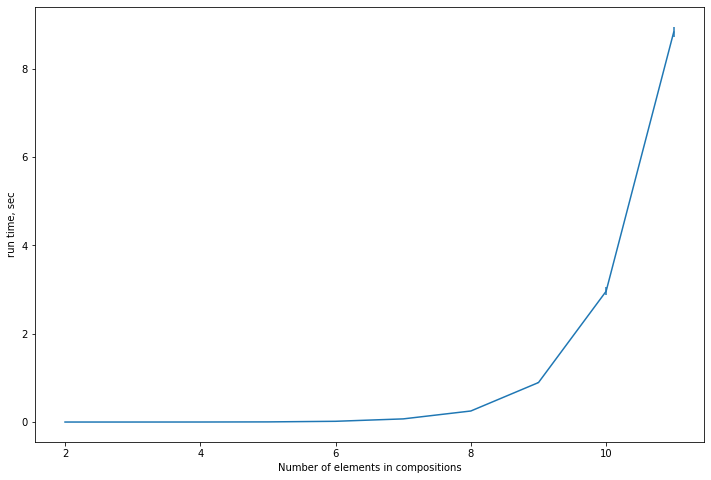

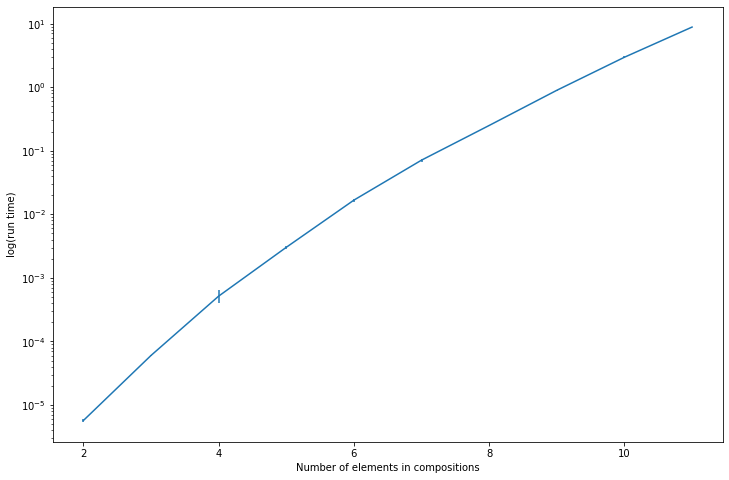

In [14]:
N = 10  # number of points
kk = lambda i: 2+i  # step formula
M = 20  # quantity of indivisible good in units of lambda

n,x,std = [0]*N,[0]*N,[0]*N   # initialize lists
for i in range(N):
    n[i] = kk(i)  # number of list elements
    t = %timeit -n2 -r10 -o for c in compositions(M,n[i]): pass
    x[i] = t.average
    std[i] = t.stdev

plt.errorbar(n,x,std)
plt.xlabel('Number of elements in compositions')
plt.ylabel('run time, sec')
plt.show()

plt.errorbar(n,x,std)
plt.yscale('log')
plt.xlabel('Number of elements in compositions')
plt.ylabel('log(run time)')
plt.show()

#### Other exponential algorithms

- Many board games (checkers, chess, shogi, go) in n-by-n generalizations  
- Traveling salesman problem (TSP)  
- Many problems in economics are subject to “curse of dimensionality”  


**Curse of dimensionality** = exponential time in solution algorithms

#### What to do with heavy to compute models?

1. Design of better solution algorithms  
1. Analyze special classes of problems + rely on problem structure  
1. Speed up the code (low level language, compilation to machine code)  
1. Parallelize the computations  
1. Bound the problem to maximize model usefulness while keeping it tractable  
1. Wait for innovations in computing technology  

#### Classes of computational complexity

Thinking of all problems there are:

- **P** can be solved in polynomial time  
- **NP** solution can checked in polynomial time, even if requires *exponential* solution algorithm  
- **NP-hard** as complex as *any* NP problem (including all exponential and combinatorial problems)  
- **NP-complete** both NP and NP-hard (tied via reductions)  


NP stands for non-deterministic polynomial time $ \leftrightarrow $ *‘magic’ guess* algorithm

#### P vs. NP

Unresolved question of whether **P = NP** or **P** $ \ne $ **NP** (\$1 mln. prize by Clay Mathematics Institute)

<img src="_static/img/complexity_classes.png" style="width:500px;">

### Further learning resources

- Profiling python code
  [https://docs.python.org/3/library/profile.html](https://docs.python.org/3/library/profile.html)  
- Complexity classes and P vs. NP
  - [https://en.wikipedia.org/wiki/P_versus_NP_problem](https://en.wikipedia.org/wiki/P_versus_NP_problem)
  - [https://cs.stackexchange.com/questions/9556/what-is-the-definition-of-p-np-np-complete-and-np-hard](https://cs.stackexchange.com/questions/9556/what-is-the-definition-of-p-np-np-complete-and-np-hard)
  - [https://www.youtube.com/watch?v=YX40hbAHx3s](https://www.youtube.com/watch?v=YX40hbAHx3s)  
- Lecture on algorithm complexity by Erik Demaine, MIT (50 min)
  [https://www.youtube.com/watch?v=moPtwq_cVH8](https://www.youtube.com/watch?v=moPtwq_cVH8)  
- Big-O cheet sheet
  [https://www.bigocheatsheet.com/](https://www.bigocheatsheet.com/)  